<a href="https://colab.research.google.com/github/pvh95/Dissertation_BME/blob/main/bootstrap_on_bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from google.colab import drive  
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np 
import pandas as pd
import random 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df2018 = pd.read_csv('/content/gdrive/MyDrive/Dissertation_CEU_BME/balance2018.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2018 = df2018[df2018['sales'] != 0]

In [5]:
df2018

,frame_id,originalid,year,sales,sales_clean,sales19,emp,tanass,tanass_clean,eszk,hlk,rlk,export,export19,egyebbev,aktivalt,ranyag,ranyag01,ranyag02,ranyag03,ranyag04,ranyagesz,wbill,wbill19,persexp,persexp_clean,persexp19,kecs,kecs_clean,egyebraf,ereduzem,pretax,jetok,jetok01,jetok03,jetok06,jetok02,jetok04,immat,immat_clean,satok,igb_vett_szolg_rekl_szolg,igb_vett_szolg_rekl_szolg_tm1,igb_vett_szolg_rekl_szolg_tm2,teaor_raw,teaor03_2d,teaor08_2d,foundyear,firmage,gdp,gdp2,tax,tax19,ppi19,gdp19,county,teaor03_1d,teaor08_1d,VAT_group_id,so3_with_mo3,so3,fo3,do3,mo3,yearly_group_id,alltime_group_id,mother_tax_id,region,final_netgep,final_gep_jarmu_ktg
0,ft10000537,10000537,2018,293879.0,293879.0,3.010476e+05,14.0,111453.0,111453.0,257811.0,0.0,25549.0,NaN,NaN,8.0,0.0,140608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118077.0,118077.0,1.209572e+05,6089.0,6089.0,13755.0,15358.0,25305.0,3405.0,NaN,NaN,NaN,NaN,NaN,2885.0,2885.0,204658.0,NaN,NaN,NaN,7490.0,74.0,74.0,1980,38,153271.0,153271.0,7471.0,7.653240e+03,0.976188,1.570097e+05,NaN,K,M,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0.0,0
1,ft10003035,10003035,2018,174369000.0,174369000.0,1.740224e+08,1774.0,46332000.0,46332000.0,144084000.0,0.0,60438000.0,138596000.0,1.383205e+08,1347000.0,7972000.0,121416000.0,106771000.0,13795000.0,559000.0,23000.0,268000.0,10928000.0,1.090628e+07,15305000.0,15305000.0,1.527458e+07,5756000.0,5756000.0,3306000.0,37905000.0,37812000.0,4000000.0,NaN,NaN,NaN,NaN,NaN,876000.0,876000.0,77932000.0,NaN,NaN,NaN,2120.0,24.0,21.0,1912,106,60925000.0,60925000.0,3202000.0,3.195635e+06,1.001992,6.080389e+07,1.0,D,C,17780948.0,0,0,1,0,0,NaN,NaN,NaN,Közép-Magyarország,14105000.0,0
2,ft10008676,10008676,2018,18545403.0,18545403.0,1.956978e+07,1955.0,177349183.0,177349183.0,196396512.0,56609854.0,23998090.0,8070275.0,8.516047e+06,21982791.0,1253797.0,16250984.0,4845388.0,8767953.0,572562.0,1380085.0,684996.0,11681903.0,1.232717e+07,16345615.0,16345615.0,1.724849e+07,6320527.0,6320527.0,1987058.0,877807.0,359752.0,6848878.0,NaN,NaN,NaN,NaN,NaN,95697.0,95697.0,14996832.0,NaN,NaN,NaN,4910.0,60.0,49.0,1876,142,3548216.0,3548216.0,84214.0,8.886566e+04,0.947655,3.744206e+06,8.0,I,H,NaN,1,1,0,0,0,89.0,123.0,10008676,Nyugat-Dunántúl,51125162.0,0
3,ft10008999,10008999,2018,651.0,651.0,6.726536e+02,10.0,1567027.0,1567027.0,2201354.0,0.0,95314.0,649.0,6.705870e+02,14027.0,121208.0,52866.0,791.0,46350.0,0.0,634.0,5091.0,76143.0,7.867567e+04,98406.0,98406.0,1.016792e+05,3886.0,3886.0,1946.0,-21218.0,-21633.0,20000.0,NaN,NaN,NaN,NaN,NaN,1861.0,1861.0,1249981.0,NaN,NaN,NaN,5222.0,63.0,52.0,1946,72,68993.0,68993.0,0.0,0.000000e+00,0.967809,7.128785e+04,1.0,I,H,NaN,1,1,0,0,0,NaN,NaN,NaN,Közép-Magyarország,0.0,0
4,ft10010622,10010622,2018,53075.0,53075.0,5.386892e+04,0.0,24264.0,24264.0,3643317.0,3810.0,7282.0,0.0,0.000000e+00,1294.0,0.0,21812.0,1307.0,11859.0,0.0,387.0,8259.0,5400.0,5.480775e+03,6544.0,6544.0,6.641888e+03,10838.0,10838.0,5364.0,9811.0,72130.0,1760500.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3632192.0,NaN,NaN,NaN,6420.0,65.0,64.0,1950,68,31263.0,31263.0,6753.0,6.854014e+03,0.985262,3.173064e+04,1.0,J,K,NaN,0,0,0,1,0,NaN,NaN,NaN,Közép-Magyarország,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420013,ft29969359,29969359,2018,26175.0,26175.0,2.816517e+04,1.0,2142.0,2142.0,16086.0,1337.0,7659.0,NaN,NaN,821.0,0.0,19730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6075.0,6075.0,6.536902e+03,304.0,304.0,217.0,670.0,607.0,2503.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7090.0,NaN,NaN,NaN,4321.0,45.0,43.0,1983,35,6445.0,6445.0,55.0,5.918183e+01,0.929339,6.935034e+03,14.0,F,F,NaN,0,0,0,1,0,NaN,NaN,NaN,Dél-Dunántúl,0.0,0
420014,ft29970627,29970627,2018,20463.0,20463.0,2.140826e+04,2.0,612.0,612.0,9544.0,1071.0,4686.0,NaN,NaN,2.0,0.0,6730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115.0,11115.0,1.162844e+04,80.0,

In [6]:
sales_tax_df = df2018[['sales', 'eszk', 'tax']]

In [7]:
len(sales_tax_df)

332643

In [8]:
sales_tax_df = sales_tax_df.dropna(subset=['eszk', 'tax'])

In [9]:
len(sales_tax_df)

332611

In [10]:
print('summmary stats for the sales')
sum_stat = sales_tax_df['sales'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the sales
count        332611.000
mean         315007.458
std         8128448.452
min               0.537
25%            4611.000
50%           18009.000
75%           70773.500
max      2371623338.000
Name: sales, dtype: object


In [11]:
print('summmary stats for the eszk')
sum_stat = sales_tax_df['eszk'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the eszk
count        332611.000
mean         367100.083
std        17064209.790
min          -11512.000
25%            5306.000
50%           16525.000
75%           61566.500
max      6264442000.000
Name: eszk, dtype: object


In [12]:
print('summmary stats for the tax')
sum_stat = sales_tax_df['tax'].describe().apply('{0:.3f}'.format)
print(sum_stat)

summmary stats for the tax
count      332611.000
mean         1957.442
std        117743.739
min             0.000
25%            18.000
50%           114.000
75%           576.000
max      63639000.000
Name: tax, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


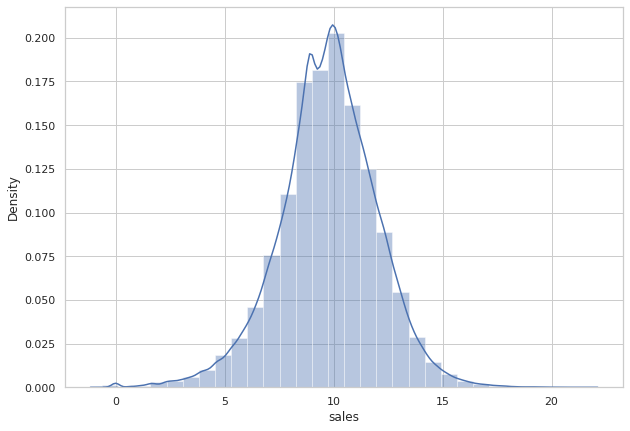

In [13]:
logSales = np.log(sales_tax_df["sales"])
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.distplot(logSales, bins = 30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


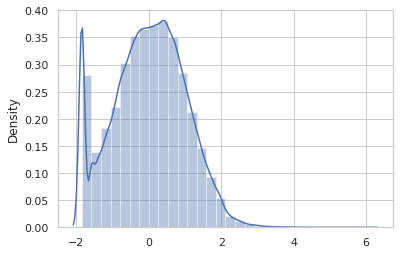

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
trialdf = pd.DataFrame(sales_tax_df, columns= ["tax"])
pt = preprocessing.PowerTransformer(method='yeo-johnson')
modified_price = pt.fit_transform(trialdf)
sns.distplot(modified_price, bins = 30) 

# Bootstrapping


In [15]:
from collections import defaultdict

In [16]:
sample_size_lst = [10000]

In [17]:
my_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(dict))))

In [18]:
np.random.seed(69)
sales = sales_tax_df['sales'].to_numpy()
sample = np.random.choice(sales, size = 6000, replace = False)

In [19]:
sales_tax_df.sample(n=100, replace=True, random_state=42)

,sales,eszk,tax
145594,38054.0,9602.0,893.0
176591,14708.0,2424.0,30.0
157652,115624.0,84042.0,209.0
319975,10463.0,3775.0,19.0
143030,229532.0,96604.0,1298.0
...,...,...,...
159907,206774.0,84948.0,1291.0
148514,2438.0,4503.0,902.0
222197,4041.0,2432.0,73.0
162979,14847.0,35308.0,69.0


In [26]:
sample_mean_sales = []
sample_std_sales = [] 
sample_median_sales = []
sample_corr_sales_eszk = []
sample_corr_sales_tax = []
sample_corr_eszk_tax = []
sample_r2 = []

for ss in sample_size_lst: 
    sales_tax_sample_df = sales_tax_df.sample(n=ss, replace=False, random_state=42)
    for _ in range(10000):
        sample_df = sales_tax_sample_df.sample(n=ss, replace=True)
        #sales_only = sample_df['sales'].to_numpy()
        #sales_temp = np.random.choice(sales_only, size=ss, replace = True)
        sample_mean_sales.append(np.mean(sample_df['sales']))
        sample_std_sales.append(np.std(sample_df['sales']))
        sample_median_sales.append(np.median(sample_df['sales']))
        sample_corr_sales_eszk.append(sample_df['sales'].corr(sample_df['eszk']))
        sample_corr_sales_tax.append(sample_df['sales'].corr(sample_df['tax']))
        sample_corr_eszk_tax.append(sample_df['eszk'].corr(sample_df['tax']))

        sample_r2.append( sm.OLS(sample_df['sales'], sample_df.iloc[:,1:]).fit().rsquared)
        






In [36]:
sales_tax_sample_df['sales'].mean()

539497.8485325

In [28]:
np.mean(sample_mean_sales)

542821.211002052

(array([3.195e+03, 2.096e+03, 2.081e+03, 1.787e+03, 6.160e+02, 1.310e+02,
        6.400e+01, 2.200e+01, 6.000e+00, 2.000e+00]),
 array([ 165338.5108425,  348462.2137915,  531585.9167405,  714709.6196895,
         897833.3226385, 1080957.0255875, 1264080.7285365, 1447204.4314855,
        1630328.1344345, 1813451.8373835, 1996575.5403325]),
 <a list of 10 Patch objects>)

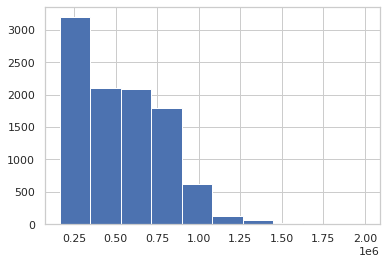

In [27]:
plt.hist(sample_mean_sales)

(array([3.000e+00, 3.400e+01, 2.720e+02, 1.124e+03, 2.405e+03, 3.314e+03,
        1.758e+03, 9.100e+02, 1.620e+02, 1.800e+01]),
 array([16589. , 16937.9, 17286.8, 17635.7, 17984.6, 18333.5, 18682.4,
        19031.3, 19380.2, 19729.1, 20078. ]),
 <a list of 10 Patch objects>)

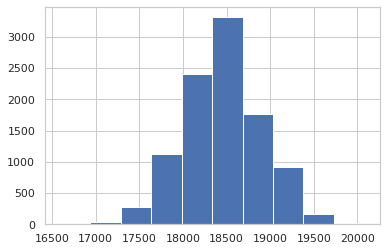

In [29]:
plt.hist(sample_median_sales)

In [30]:
np.mean(sample_median_sales)

18461.72795

In [31]:
np.mean(sample_std_sales)

20152469.97722932

In [ ]:
for ss in sample_size_lst:
    for reps in reps_lst: 
        for tab in tables_lst: 
            my_dict[ss][reps][tab] = None

In [ ]:
my_dict

defaultdict(<function __main__.<lambda>()>,
            {100: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {100: defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'sf': None,
                                       'tr': None,
                                       'trbs': None,
                                       'bs': None}),
                          1000: defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'sf': None,
                                       'tr': None,
                                       'trbs': None,
                                       'bs': None}),
                          10000: defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'sf': None,
                                       'tr': None,
                      

In [ ]:
df2018 = pd.read_csv('balance2018.csv')

/home/phamv/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df2018 = df2018[df2018['sales'] != 0]

In [ ]:
sales_df = df2018['sales'].astype(np.int64)

In [ ]:
mu = sales_df.mean(skipna = True)
print(f'mean sales = {mu:.3f}')

mean sales = 318387.765


In [ ]:
sigma = sales_df.std(skipna = True)
print(f'std of sales = {sigma:.3f} \n')

print('summmary stats for the dataframe')
sum_stat = df2018['sales'].describe().apply('{0:.3f}'.format)
print(sum_stat)

std of sales = 8196279.184 

summmary stats for the dataframe
count        332643.000
mean         318387.765
std         8196279.184
min               0.537
25%            4612.000
50%           18012.000
75%           70802.000
max      2371623338.000
Name: sales, dtype: object


In [ ]:
sales = sales_df.to_numpy()

In [ ]:
from collections import defaultdict

In [ ]:
sample_size_lst = [100, 500, 1000, 5000]
reps_lst = [100, 1000, 10000]
tables_lst=['sf', 'tr', 'trbs', 'bs']

In [ ]:
my_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

In [ ]:
for ss in sample_size_lst: 
    for reps in reps_lst: 
        for tab in tables_lst:
            my_dict[ss][reps][tab] = None

In [ ]:
my_dict

defaultdict(<function __main__.<lambda>()>,
            {100: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {100: defaultdict(dict,
                                      {'sf': None,
                                       'tr': None,
                                       'trbs': None,
                                       'bs': None}),
                          1000: defaultdict(dict,
                                      {'sf': None,
                                       'tr': None,
                                       'trbs': None,
                                       'bs': None}),
                          10000: defaultdict(dict,
                                      {'sf': None,
                                       'tr': None,
                                       'trbs': None,
                                       'bs': None})}),
             500: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                    

In [ ]:
def create_empty_df(column_names):
    df = pd.DataFrame(columns = column_names)
    
    return df 

In [ ]:
np.random.seed(11)
for ss in my_dict.keys():
    sample = np.random.choice(sales, ss, replace = False)
    xbar = np.mean(sample)
    #print('xbar:', xbar)
    s2 = np.std(sample)**2
    #print('s2:', s2)
    for reps in my_dict[ss].keys():
        allxbar  = np.zeros((reps, 1))
        alls2    = np.zeros((reps, 1))
        u = np.random.random((ss,reps))
        r = 0
        while r < reps:
            indices = np.floor(u[: ,r]*ss).astype(int) # (b x 1) vector of integers between 1 and n:
        #these are the indices of master sample elements selected into the
        #bootstrap sample
            bsample = sample[indices]
            allxbar[r] = np.mean(bsample)
            alls2[r] = np.std(bsample)**2
            r = r + 1
        
        for tab in my_dict[ss][reps].keys():
            b = ss
            if tab == 'sf': 
                sf_df = create_empty_df(['Statistics', 'Value', 'Sampl_Size','Bs_Resampl'])
                sf_df['Statistics'] = ['xbar', 's-sqd']
                sf_df['Value'] = [xbar, s2]
                sf_df['Sampl_Size'] = [b, b]
                sf_df['Bs_Resampl'] = [reps, reps]
                my_dict[ss][reps][tab] = sf_df
                
                
            if tab == 'tr':
                tr_df = create_empty_df(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE', 'Sampl_Size','Bs_Resampl'])
                tr_df['Estimator'] = ['xbar', 's-sqd']
                tr_df['Mean'] = [mu, (((b-1)/b)*sigma**2)]
                tr_df['Bias'] = [0, ((sigma**2)/b)]
                tr_df['Variance'] = [((sigma**2)/b), (2*(sigma**4)*(b-1)/(b**2))]
                tr_df['MSE'] = [((sigma**2)/b), ((2*b-1)*(sigma**4)/(b**2))]
                tr_df['Sampl_Size'] = [b, b]
                tr_df['Bs_Resampl'] = [reps, reps]
                
                my_dict[ss][reps][tab] = tr_df
                
            
            if tab == 'trbs':
                trbs_df = create_empty_df(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE', 'Sampl_Size','Bs_Resampl'])
                trbs_df['Estimator'] = ['xbar', 's-sqd']
                trbs_df['Mean'] = [xbar, (((b-1)/b)*s2)]
                trbs_df['Bias'] = [0, s2/b]
                trbs_df['Variance'] = [s2/b, (2*(s2**2)*(b-1)/(b**2))]
                trbs_df['MSE'] = [s2/b, ((2*b-1)*(s2**2)/(b**2))]
                trbs_df['Sampl_Size'] = [b, b]
                trbs_df['Bs_Resampl'] = [reps, reps]
                
                my_dict[ss][reps][tab] = trbs_df
                
            if tab == 'bs': 
                bs_df = create_empty_df(['Estimator', 'Mean', 'Bias', 'Variance', 'MSE', 'Sampl_Size','Bs_Resampl'])
                bs_df['Estimator'] = ['xbar', 's-sqd']
                bs_df['Mean'] = [np.mean(allxbar), np.mean(alls2)]
                bs_df['Bias'] = [np.abs(xbar-np.mean(allxbar)), np.abs(s2-np.mean(alls2))]
                bs_df['Variance'] = [np.std(allxbar)**2, np.std(alls2)**2]
                bs_df['MSE'] = [np.mean((allxbar-xbar)**2), np.mean((alls2-s2)**2)]
                bs_df['Sampl_Size'] = [b, b]
                bs_df['Bs_Resampl'] = [reps, reps]
            
                my_dict[ss][reps][tab] = bs_df
        
        
        

In [ ]:
my_dict[5000][100]['tr']

,Estimator,Mean,Bias,Variance,MSE,Sampl_Size,Bs_Resampl
0,xbar,3.183878e+05,0.000000e+00,1.343580e+10,1.343580e+10,5000,100
1,s-sqd,6.716556e+13,1.343580e+10,1.804846e+24,1.805026e+24,5000,100


In [ ]:
my_dict[500][100]['sf']

,Statistics,Value,Sampl_Size,Bs_Resampl
0,xbar,1.355415e+05,500,100
1,s-sqd,1.495831e+11,500,100


In [ ]:
my_dict[500][100]['trbs']

,Estimator,Mean,Bias,Variance,MSE
0,xbar,1.355415e+05,0.000000e+00,2.991663e+08,2.991663e+08
1,s-sqd,1.492840e+11,2.991663e+08,8.932145e+19,8.941095e+19


In [ ]:
my_dict[100][10000]['bs']

,Estimator,Mean,Bias,Variance,MSE,Sampl_Size,Bs_Resampl
0,xbar,1.197223e+05,3.808246e+02,1.549115e+09,1.549260e+09,100,10000
1,s-sqd,1.576333e+11,2.101523e+09,1.258074e+22,1.258515e+22,100,10000


In [ ]:
my_dict[5000][10000]['bs']

,Estimator,Mean,Bias,Variance,MSE,Sampl_Size,Bs_Resampl
0,xbar,2.515947e+05,1.854298e+02,1.163500e+09,1.163534e+09,5000,10000
1,s-sqd,5.827514e+12,2.936398e+10,7.494510e+24,7.495372e+24,5000,10000


In [ ]:
my_dict[5000][10000]['tr']

,Estimator,Mean,Bias,Variance,MSE,Sampl_Size,Bs_Resampl
0,xbar,3.183878e+05,0.000000e+00,1.343580e+10,1.343580e+10,5000,10000
1,s-sqd,6.716556e+13,1.343580e+10,1.804846e+24,1.805026e+24,5000,10000
